In [1]:
#library imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
sns.set()

In [2]:
df = pd.read_csv("/Users/prasoonsingh/Mtech/sf_crime_Py/train.csv")
df = df.drop_duplicates()
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
##extract datetime feature
df.Dates = pd.to_datetime(df.Dates)
df['Time'] = df.Dates.map(lambda x : x.strftime("%H:%M:%S"))
df['Years'] = df.Dates.map(lambda x : x.year)
df['Month'] = df.Dates.map(lambda x : x.month)
df['Hour'] = df.Dates.map(lambda x : x.hour)
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Time,Years,Month,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53:00,2015,5,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23:53:00,2015,5,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23:33:00,2015,5,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23:30:00,2015,5,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23:30:00,2015,5,23


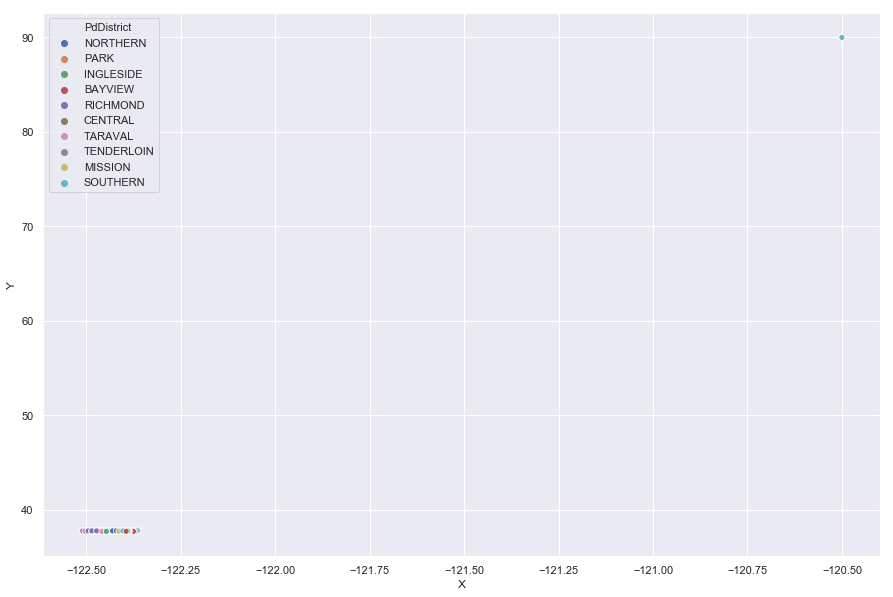

In [4]:
grouped_by_crime = df.groupby('Category')
plt.figure(figsize=(15,10))
sns.scatterplot(x = "X", y = "Y", hue = "PdDistrict", data = df)

In [5]:
#print (df.loc[df.Y > 50])##all outlier are (-120.5, 90.0)
df.replace({'X' : -120.5, 'Y' : 90.0}, np.NAN, inplace=True)
print (df.X.isna().sum())
print (df.Y.isna().sum())
df.X.fillna(df.groupby("PdDistrict").X.transform("mean"), inplace=True)
df.Y.fillna(df.groupby("PdDistrict").Y.transform("mean"), inplace=True)
print (df.X.isna().sum())
print (df.Y.isna().sum())

67
67
0
0


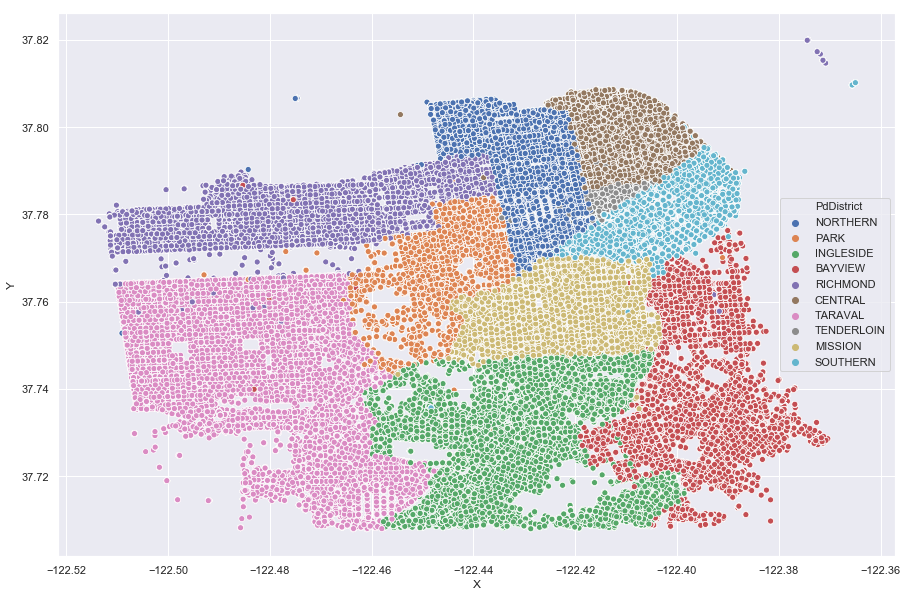

In [14]:
grouped_by_crime = df.groupby('Category')
plt.figure(figsize=(15,10))
sns.scatterplot(x = "X", y = "Y", hue = "PdDistrict", data = df)

In [6]:
crime_categories = df.Category.unique()
print ("No of crime categories: ", len(crime_categories))
print (crime_categories)

No of crime categories:  39
['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


   Month  Count
0    Oct  80038
1    May  79467
2    Apr  77889
3    Mar  76130
4    Jan  73335
5    Nov  72748
6    Sep  71805
7    Jun  70666
8    Feb  70666
9    Jul  69785
10   Aug  68341
11   Dec  64856


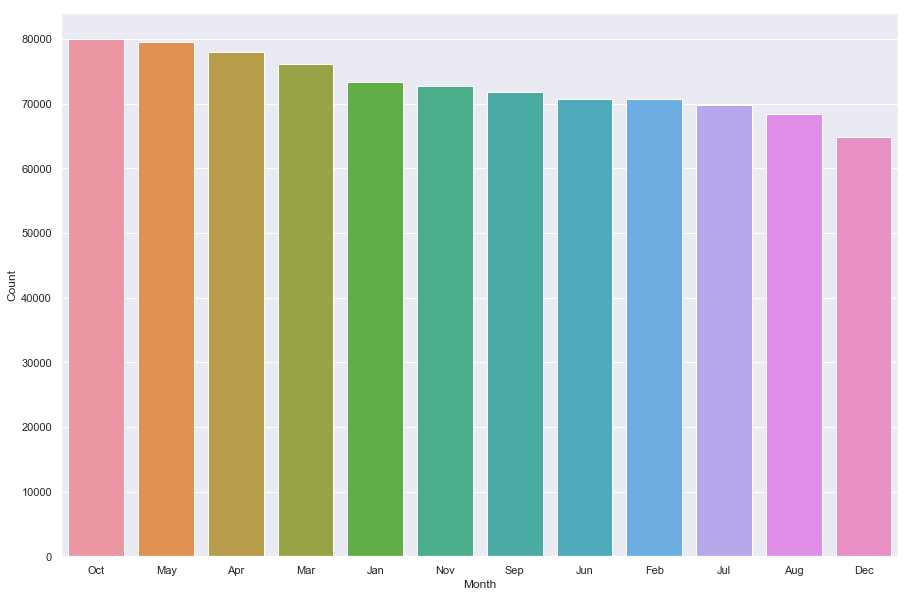

In [7]:
crime_by_month = df.Month.value_counts().to_frame().reset_index()
crime_by_month.columns = ['Month', 'Count']
crime_by_month.Month = crime_by_month.Month.map(lambda x:calendar.month_abbr[x])
print (crime_by_month)
#sns.catplot(x = "Month", y="Count", kind="bar", data=crime_by_month)
#crime_by_month.index
#crime_by_month.count
plt.figure(figsize=(15,10))
sns.barplot(x = "Month", y = "Count", data = crime_by_month)

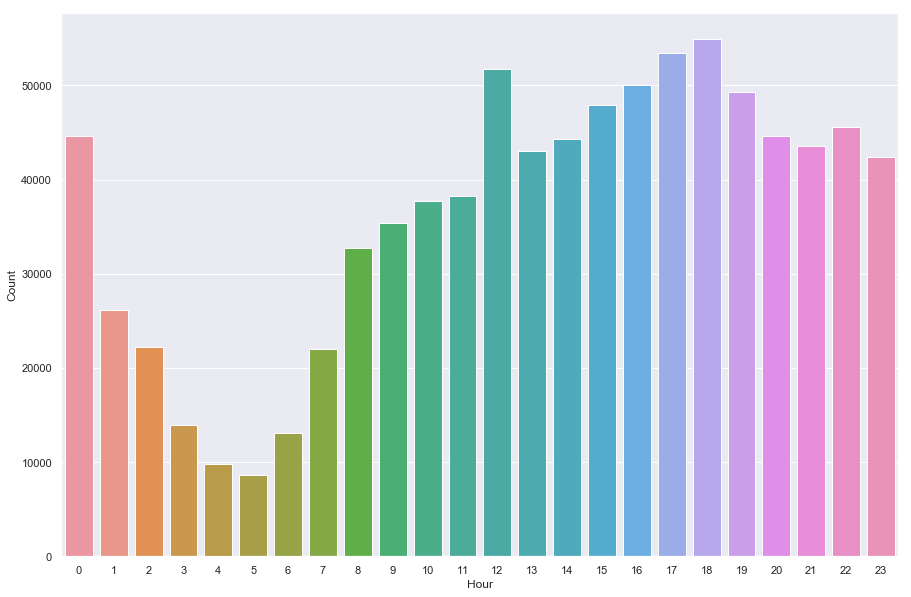

In [8]:
crime_by_hour = df.Hour.value_counts().to_frame().reset_index()
crime_by_hour.columns = ["Hour", "Count"]
plt.figure(figsize=(15,10))
sns.barplot(x = "Hour", y = "Count", data = crime_by_hour)

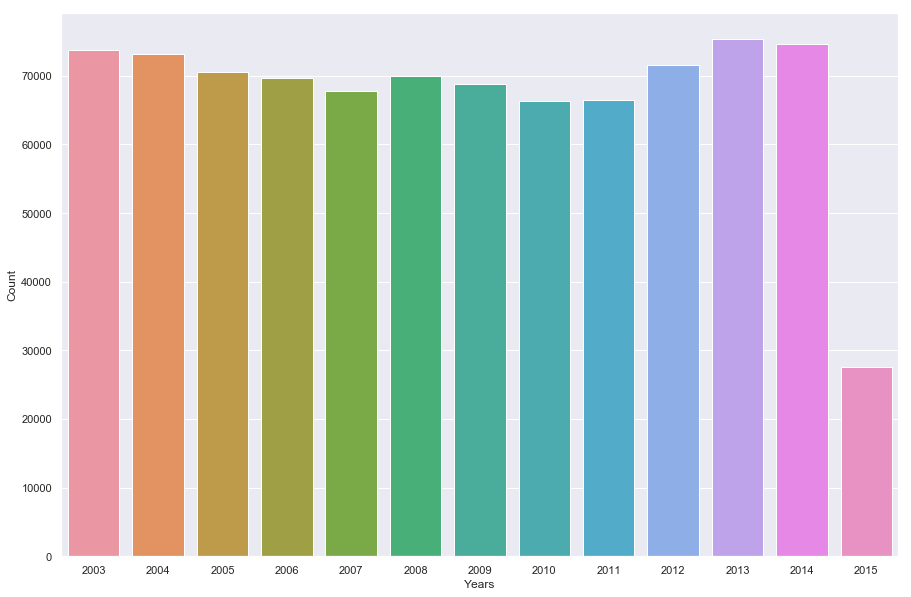

In [9]:
crime_by_years = df.Years.value_counts().to_frame().reset_index()
crime_by_years.columns = ["Years", "Count"]
plt.figure(figsize=(15,10))
sns.barplot(x = "Years", y = "Count", data = crime_by_years)

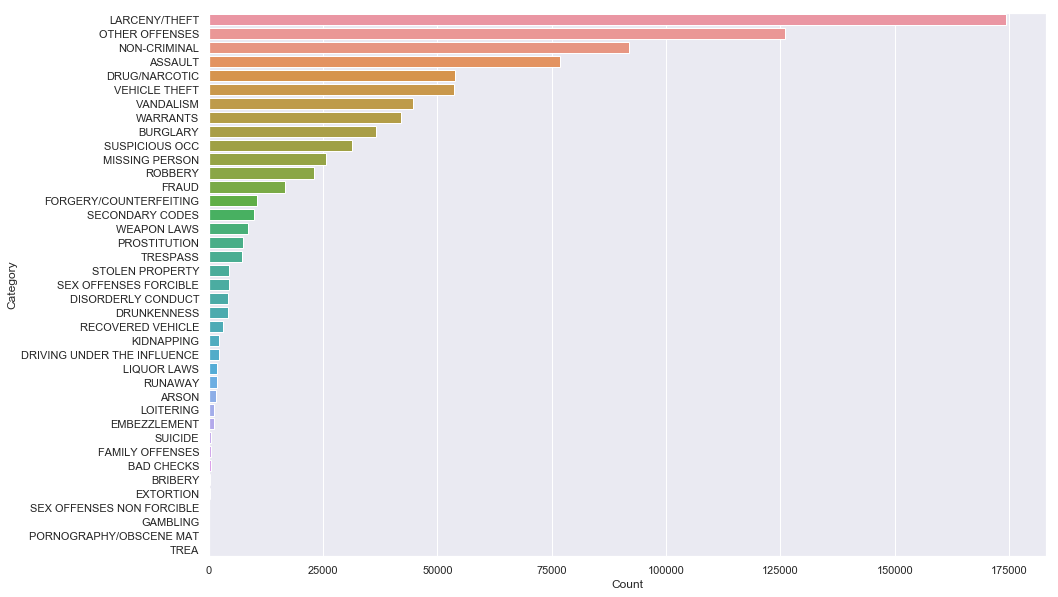

In [10]:
crime_category_count = df.Category.value_counts().to_frame().reset_index()
crime_category_count.columns = ['Category', 'Count']
plt.figure(figsize=(15,10))
sns.barplot(x = "Count", y = "Category", data = crime_category_count)

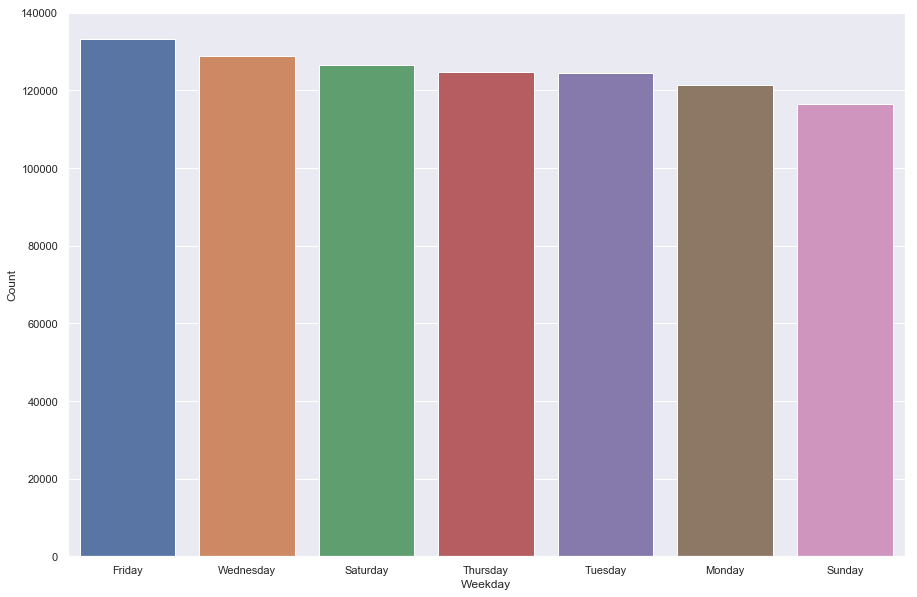

In [11]:
crime_by_weekday = df.DayOfWeek.value_counts().to_frame().reset_index()
crime_by_weekday.columns = ['Weekday', 'Count']
plt.figure(figsize=(15,10))
sns.barplot(x = "Weekday", y = "Count", data = crime_by_weekday)

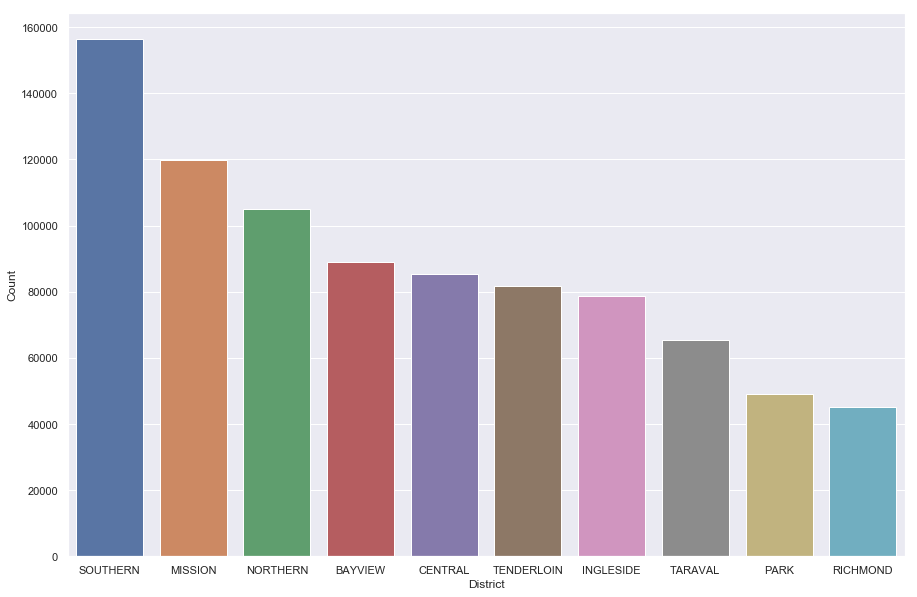

In [12]:
crime_by_district = df.PdDistrict.value_counts().to_frame().reset_index()
crime_by_district.columns = ["District", "Count"]
plt.figure(figsize=(15,10))
sns.barplot(x = "District", y = "Count", data = crime_by_district)

In [13]:
print (df.duplicated().sum())

0
